# Machine Learning : final project

By **Jean Zagdoun** and **Yohan Foucade**

The goal of this project is to explore and extract information from the **train.csv** dataset, using machine learning algorithms.

Let's start with importing, visualizing and preprocessing the data.

In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_curve, f1_score, auc
from IPython.display import Latex
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

/home/zagdoun/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/zagdoun/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Import the data

In [3]:
data = pd.read_csv('train.csv')

## Data exploration and preprocessing

In [4]:
data.head(n = 10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [5]:
data.describe(include = 'all')

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we don't care about id we drop it..

In [6]:
data = data.drop(['id'],axis=1)

In [7]:
data['target'].isin([0, 1]).all()

True

This is a **binary classification** problem.

In [8]:
#How many 0s? 1s?
nb1 = data['target'].isin([1]).sum()
nb0 = data['target'].isin([0]).sum()
print('nb of zeros :', nb0)
print('nb of ones :', nb1)
prop1 = nb1 / (nb1 + nb0)
prop0 = 1 - prop1
print(prop0, prop1)

nb of zeros : 573518
nb of ones : 21694
0.963552482141 0.0364475178592


We have an unbalanced dataset. We will have to adress this problem

In [9]:
data.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [10]:
data.dtypes

target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01  

their are lot's of categorical data

And as missing data are represented by -1 we will investigate how they are spread in the dataset

In [11]:
data.isin([-1]).sum()

target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


So they are a lot of missing values but distributed in a small number of collumns

In [12]:
#Delete columns with a lot of missing values.
data = data.drop(['ps_ind_05_cat', 'ps_reg_03', 
                            'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat','ps_car_14'], axis=1)

In [13]:
data.shape

(595212, 52)

In [14]:
#Delete lines with missing values
data = data[~data.isin([-1]).any(axis=1)]

In [15]:
data.shape
#we didn't loose much of data

(594444, 52)

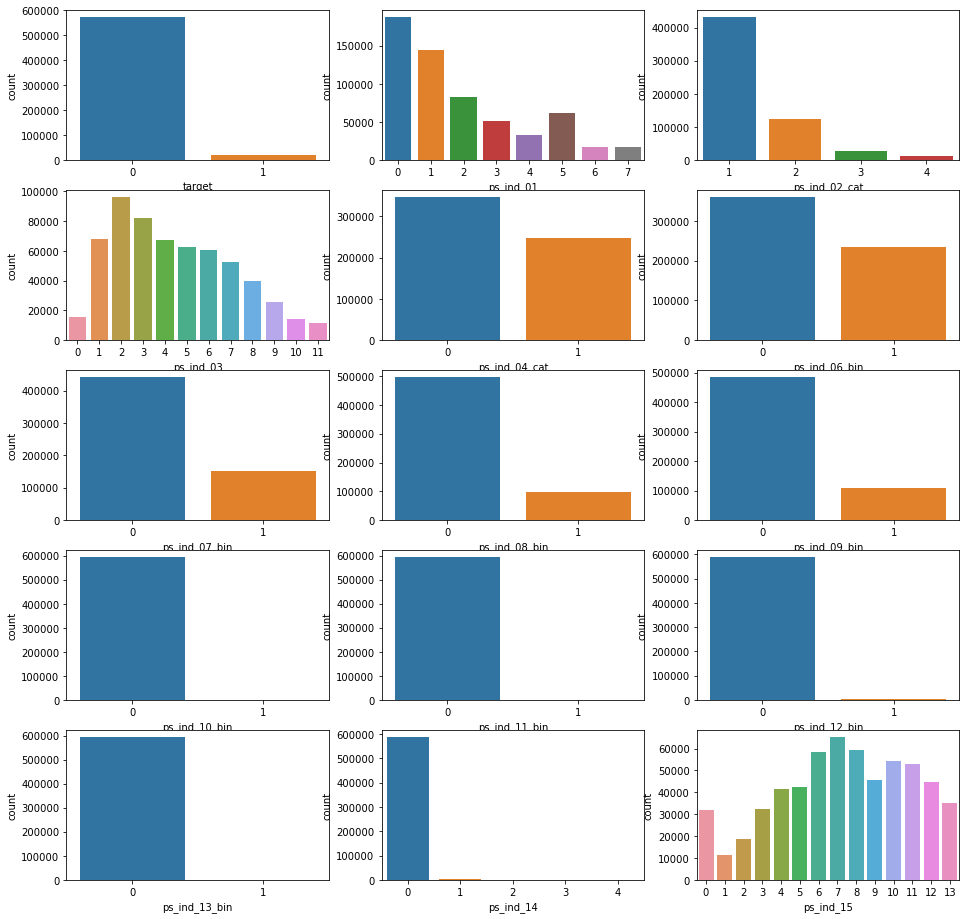

In [16]:
i = 0
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
columns = [*data.columns[15 * i  : 15 * i + 15]]

for i, colname in enumerate(columns):
    sns.countplot(colname, data=data, ax=fig.axes[i])

In [17]:
for elt in ['ps_ind_10_bin','ps_ind_11_bin','ps_ind_13_bin', 'ps_ind_14','ps_ind_12_bin']:
    print(pd.crosstab(data['target'], columns = data[elt]), '\n')

ps_ind_10_bin       0    1
target                    
0              572612  210
1               21610   12 

ps_ind_11_bin       0    1
target                    
0              571862  960
1               21577   45 

ps_ind_13_bin       0    1
target                    
0              572290  532
1               21594   28 

ps_ind_14       0     1    2    3  4
target                              
0          566773  5213  706  126  4
1           21306   270   36    9  1 

ps_ind_12_bin       0     1
target                     
0              567505  5317
1               21334   288 



In [18]:
#some classes are obviously useless
data = data.drop(['ps_ind_10_bin','ps_ind_11_bin','ps_ind_13_bin','ps_ind_14','ps_ind_12_bin'],axis=1)

In [19]:
labels = data['target'].copy()

In [20]:
data = data.drop(['target'],axis=1)

# Let's make the data talk!

We will naivly try to use the adaboost algorithm on our data and see how good it's doing and maybe it will lead us to using different technics and/or model

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data,labels, test_size=0.3)

In [22]:
X_test.shape

(178334, 46)

In [23]:
Y_train.mean()

0.036360577731849753

In [24]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,criterion='entropy'))
adaboost.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

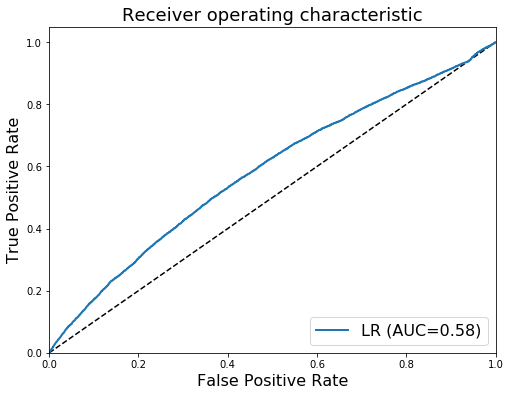

In [25]:
fpr, tpr, _ = roc_curve(Y_test, adaboost.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [26]:
print(classification_report(Y_test,adaboost.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    171842
          1       0.06      0.00      0.00      6492

avg / total       0.93      0.96      0.95    178334



# conclusion for this first model

The model is finally not so good and a little long to run.    
We will try other similar methods(gradient boosting,..) but with the XGBoost librairy wich is much faster!
Further more it's main disadventage is the **lack of occurence of the label 1** we will try in a first place to see if we can remediate to this

-First attempt will just be multiplying the number of label 1 in a new dataset and see how it is working

In [27]:
ones = X_train.copy()
ones = ones[Y_train.isin([1])]

In [28]:
ones.shape

(15130, 46)

In [29]:
m_ones = np.concatenate((ones,ones),axis=0)

In [30]:
m_ones.shape

(30260, 46)

In [31]:
m_ones = np.concatenate((m_ones,m_ones),axis=0)

In [32]:
m_ones.shape

(60520, 46)

In [33]:
m_ones = np.concatenate((m_ones,m_ones),axis=0)
m_ones = np.concatenate((m_ones,m_ones),axis=0)
m_ones.shape[0]

242080

In [34]:
X_train[~Y_train.isin([1]).values].shape

(400980, 46)

$$$$
## so we have arrived to a reasonable ratio of 1 let's see what it gives us in training

We can assume that a model will not just learn how to recreate 0's if we give him  $\approx30\%$ of 1 even if they are globally all the same...
But first let's see on a model if it works better with more 1:

For that we will first train a random forest classifier with the original data and then compare the same model (with the same parameters but with our modified dataset were we multiplied the occurence of $1$'s
$$$$

In [35]:
new_Xtrain = pd.DataFrame(np.concatenate((X_train,m_ones),axis=0))
new_Ytrain = pd.DataFrame(np.concatenate((Y_train,np.ones(shape=m_ones.shape[0])),axis=0))

In [36]:
new_Ytrain.shape

(658190, 1)

In [37]:
new_Xtrain.shape 

(658190, 46)

In [38]:
idx = np.random.permutation(len(new_Xtrain))

In [39]:
#shuffling the data is essential
idx = np.random.permutation(len(new_Xtrain))

new_Xtrain, new_Ytrain = pd.DataFrame(new_Xtrain.values[idx]), pd.DataFrame(new_Ytrain.values[idx].ravel())

In [40]:
RandFor = RandomForestClassifier(criterion='entropy',max_depth=9,n_jobs=-1)
RandFor.fit(X_train , Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

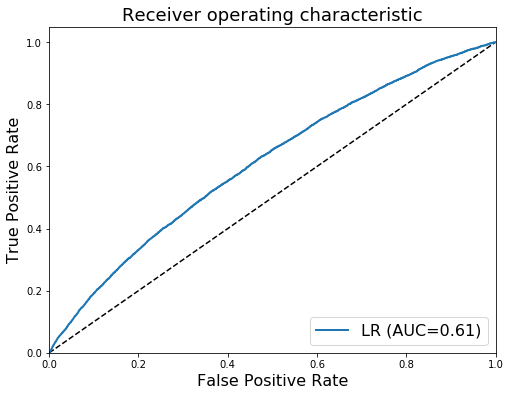

In [41]:
fpr, tpr, _ = roc_curve(Y_test, RandFor.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [42]:
print(classification_report(Y_test,RandFor.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    171842
          1       0.00      0.00      0.00      6492

avg / total       0.93      0.96      0.95    178334



/home/zagdoun/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
RandFor = RandomForestClassifier(criterion='entropy',max_depth=9,n_jobs=-1)
RandFor.fit(new_Xtrain , new_Ytrain)

/home/zagdoun/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

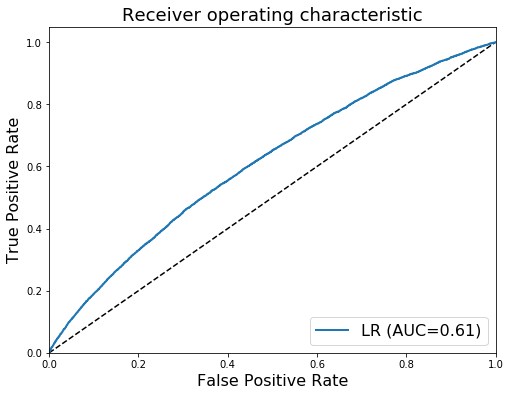

In [44]:
fpr, tpr, _ = roc_curve(Y_test, RandFor.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [45]:
print(classification_report(Y_test,RandFor.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96    171842
          1       0.08      0.11      0.09      6492

avg / total       0.93      0.92      0.93    178334



$$$$
With the same model we see an increasing performance in the precision on classifing the 1's (we assume it's because we multiplied their number).   
The first model learned only to classify $0$'s and have a recall of 0 for classifing $1$'s correctly but here $\approx 10\%$ of the $1$'s are correctly classify (recall = $\frac{TP}{FP+TN}$)
So we can say that this model really learned a pattern on $1$'s since $10>4$ and $4\%$ is the proportion of $1$'s in the original dataset.Our interpretation is that it doesn't try at random to gess this class 
$$$$
** Note that if we just focused on the AUC score we couldn't have seen any improuvement of our model**
$$$$
And so from this result we will now focus our performence of all the model on the recall it gives us for the $1$'s.
$$$$
Now next step is to try the XGBoost library on our data and see if we can do better than that
$$$$

In [46]:
import xgboost as xgb

In [47]:
gbm = xgb.XGBClassifier(max_depth=7, n_estimators=100, learning_rate=0.1,scale_pos_weight=0.5,max_delta_step=3).fit(new_Xtrain.values,(new_Ytrain.values).ravel())

note that we used scale_pos_weight and max_delta_step as suggested in http://xgboost.readthedocs.io/en/latest//parameter.html#parameters-for-tree-booster and  http://xgboost.readthedocs.io/en/latest///how_to/param_tuning.html their values are totally random :)

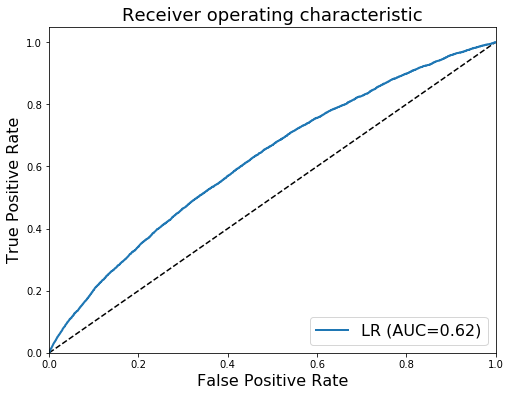

In [48]:
fpr, tpr, _ = roc_curve(Y_test.values, gbm.predict_proba(X_test.values)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [49]:
print(classification_report(Y_test.values,gbm.predict(X_test.values)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    171842
          1       0.10      0.01      0.03      6492

avg / total       0.93      0.96      0.94    178334



## Conclusion for our first use of XGB
$$$$
The model was slow and we have a really bad recall on the $1$ class but by tuning the parameter of this model we expect to improve this.

Another idea : maybe the number of features is blocking the algorithm let's try an reduce the dimensions
$$$$

In [50]:
from sklearn.decomposition import pca

pca = pca.PCA(n_components=25)
U = pca.fit_transform(new_Xtrain.values)

In [51]:
gbm = xgb.XGBClassifier(max_depth=7, n_estimators=100, learning_rate=0.01,scale_pos_weight=0.5,max_delta_step=3).fit(U,(new_Ytrain.values).ravel())

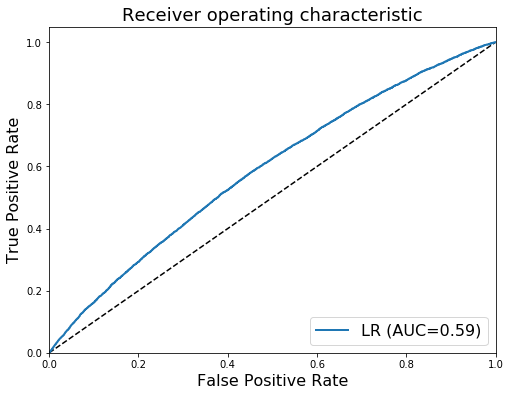

In [52]:
UU = pca.fit_transform(X_test.values)
fpr, tpr, _ = roc_curve(Y_test.values, gbm.predict_proba(UU)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [53]:
print(classification_report(Y_test.values,gbm.predict(UU)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    171842
          1       0.06      0.00      0.00      6492

avg / total       0.93      0.96      0.95    178334



**Not a good idea it's really, really long to compute and the results are not astonishing...**
$$$$
$$$$


now that we know how to use xgboost let's try to run a grid search to see what parameter works more with XGBclassifier .

source of most of the code bellow : https://www.kaggle.com/phunter/xgboost-with-gridsearchcv

As seen above the our main objective will be classifing correctly the $1$'s but we will still print the ROC curve and take a look at the AUC .

The problem is that our goal is not a standard one but we will just have to precise to the gridsearch a custom way to rank all the algorithm 

For this task we used help from :

-http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html                     
-http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

Last remark : we used only the training data for GridSearchCV() but it does a Kfold cross validation so we could have used all the data,the reason we didn't do this way is that the grid search is very long to run so we didn't want to wait for ever...

In [54]:
from sklearn.metrics import make_scorer

In [55]:
def loss_func(y, y_pred):
    I = pd.DataFrame(y)
    idx = np.array(I.isin([1])).ravel()
    loss = sum(abs(y[idx]-y_pred[idx]))
    return loss
#first attempt of making a custom score, does not work so well and is equivalent to recall_score in theory


def loss_func2(y, y_pred):
    return 0.7*recall_score(y, y_pred)+0.3*recall_score(y, y_pred,pos_label=0)
#second attempt to make a custom score is more in the philosophy of our presumed best estimator

custom_score = make_scorer(loss_func,greater_is_better =True)
custom_score2 = make_scorer(recall_score,greater_is_better =True)
custom_score3 = make_scorer(loss_func2,greater_is_better =True)

#here we can see that defining a good classifier is sometimes hard for exemple if we only focus on the classifing 
#of 1's and we use class_weights it will give us a very bad model for classifing the 0's

In [56]:
U = np.array([0,0,1,1,1,0])
V = np.array([1,0,0,1,0,1])

print(loss_func(U,V))
print(loss_func2(U,V))
#custom loss functions working find

2
0.333333333333


In [57]:
GBM = xgb.XGBClassifier()
parameters = {
        'learning_rate': [0.01,0.1],
        'n_estimators': [100], 
        'max_depth': [7,4],
        'scale_pos_weight': [1.5,0.5],
        'max_delta_step': [3],
        'gamma': [10],
        'min_child_weight': [6],
        'subsample': [0.6],
        'reg_alpha': [8]
    }

clf = GridSearchCV(GBM, parameters, n_jobs=-1,scoring=custom_score3,verbose=3,cv=2)

In [58]:
clf.fit(new_Xtrain.values,new_Ytrain.values.ravel())
#it's long to run this code ...

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] gamma=10, learning_rate=0.01, max_delta_step=3, max_depth=7, min_child_weight=6, n_estimators=100, reg_alpha=8, scale_pos_weight=1.5, subsample=0.6 
[CV] gamma=10, learning_rate=0.01, max_delta_step=3, max_depth=7, min_child_weight=6, n_estimators=100, reg_alpha=8, scale_pos_weight=1.5, subsample=0.6 
[CV] gamma=10, learning_rate=0.01, max_delta_step=3, max_depth=7, min_child_weight=6, n_estimators=100, reg_alpha=8, scale_pos_weight=0.5, subsample=0.6 
[CV] gamma=10, learning_rate=0.01, max_delta_step=3, max_depth=7, min_child_weight=6, n_estimators=100, reg_alpha=8, scale_pos_weight=0.5, subsample=0.6 
[CV]  gamma=10, learning_rate=0.01, max_delta_step=3, max_depth=7, min_child_weight=6, n_estimators=100, reg_alpha=8, scale_pos_weight=0.5, subsample=0.6, score=0.303579 - 4.1min
[CV] gamma=10, learning_rate=0.01, max_delta_step=3, max_depth=4, min_child_weight=6, n_estimators=100, reg_alpha=8, scale_pos_weight=1.5, subsam

[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 12.6min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1], 'n_estimators': [100], 'max_depth': [7, 4], 'scale_pos_weight': [1.5, 0.5], 'max_delta_step': [3], 'gamma': [10], 'min_child_weight': [6], 'subsample': [0.6], 'reg_alpha': [8]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(loss_func2), verbose=3)

In [59]:
clf.best_params_

{'gamma': 10,
 'learning_rate': 0.1,
 'max_delta_step': 3,
 'max_depth': 7,
 'min_child_weight': 6,
 'n_estimators': 100,
 'reg_alpha': 8,
 'scale_pos_weight': 1.5,
 'subsample': 0.6}

In [60]:
preds = clf.best_estimator_.predict_proba(X_test.values)

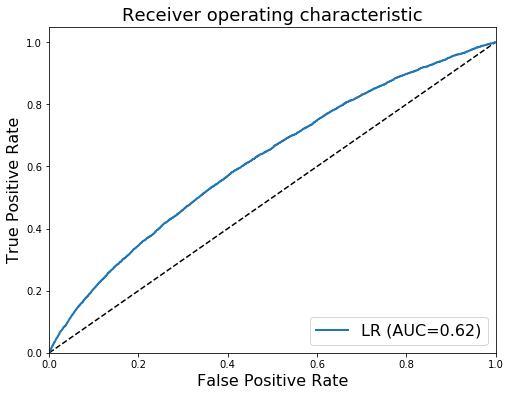

In [61]:
fpr, tpr, _ = roc_curve(Y_test,preds[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [62]:
print(classification_report(Y_test.values,clf.best_estimator_.predict(X_test.values)))
#so our score didn't work so well on this gridsearch

             precision    recall  f1-score   support

          0       0.97      0.74      0.84    171842
          1       0.06      0.42      0.10      6492

avg / total       0.94      0.73      0.81    178334



In [63]:
print(clf.scorer_(clf.best_estimator_,X_test.values,Y_test.values))
print(loss_func(Y_test.values,clf.best_estimator_.predict(X_test.values)))

0.515275263282
3768.0


# Conclusion of our first grid Search 

It's our best model so far we have a really good recall on the $1$ class but we see that in order to obtain this result we had to loss "precision" in classifying the $0$'s

Let's move on to using this wonderfull grid search algorithm but with random forest this time ! 

In [64]:
parameters = {'n_estimators': [50],
              'max_depth': [5,9,11],
              'min_samples_leaf': [1,3],
              'class_weight': [{0:0.8,1:1},{0:0.9,1:1}],
              'criterion' : ["gini", "entropy"],
              'max_leaf_nodes': [None,7]
             }
              

RF = RandomForestClassifier()
CLF = GridSearchCV(RF,parameters,n_jobs=-1,scoring=custom_score3,verbose=3,cv=2)

In [65]:
CLF.fit(new_Xtrain.values,new_Ytrain.values.ravel())

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV] class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50 
[CV] class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50 
[CV] class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50 
[CV] class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50 
[CV]  class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, score=0.439175 -  31.0s
[CV] class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=7, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.8, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50, score=0.437456 -  31.0s
[CV] class_weight={0: 0.8, 1: 1}, criterion=g

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.8min


[CV]  class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, score=0.440494 -  32.7s
[CV] class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=7, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, score=0.440134 -  34.4s
[CV] class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=7, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50, score=0.440492 -  34.6s
[CV] class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, n_estimators=50 
[CV]  class_weight={0: 0.8, 1: 1}, criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50, score=0.439651 -  34.9s
[CV] class_weight={0: 0.8, 1: 1}, criteri

[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=7, min_samples_leaf=3, n_estimators=50, score=0.329256 -  25.6s
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, score=0.458396 -  46.9s
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=7, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, score=0.461752 -  47.7s
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=7, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=9, max_leaf_nodes=None, mi

[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, n_estimators=50, score=0.334605 -  25.5s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=9, max_leaf_nodes=7, min_samples_leaf=3, n_estimators=50, score=0.337687 -  25.5s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, n_estimators=50, score=0.526325 -  52.2s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=7, min_samples_leaf=1, n_estimators=50 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_dep

[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 14.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50], 'max_depth': [5, 9, 11], 'min_samples_leaf': [1, 3], 'class_weight': [{0: 0.8, 1: 1}, {0: 0.9, 1: 1}], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [None, 7]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(loss_func2), verbose=3)

In [66]:
CLF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 0.8, 1: 1},
            criterion='gini', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
CLF.best_score_

0.6052531907805232

In [68]:
preds = CLF.best_estimator_.predict_proba(X_test.values)

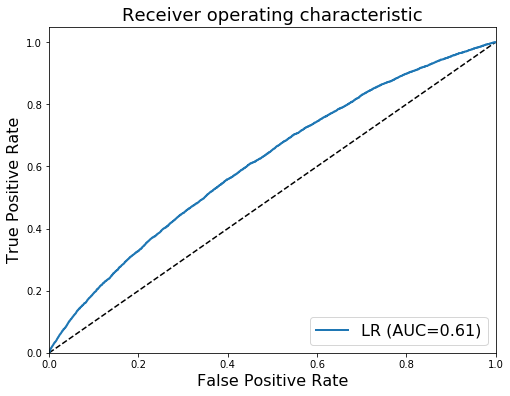

In [69]:
fpr, tpr, _ = roc_curve(Y_test,preds[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [70]:
print(classification_report(Y_test.values,CLF.best_estimator_.predict(X_test.values)))
#not so bad but we see that we have to make a compromise etween classifing the 1 or the 0 correctly...

             precision    recall  f1-score   support

          0       0.97      0.90      0.93    171842
          1       0.07      0.19      0.10      6492

avg / total       0.93      0.88      0.90    178334



In [71]:
#idea : maybe by taking adaboost but with our best estimator we will find a good result!!!
adabst = AdaBoostClassifier(base_estimator=CLF.best_estimator_)
adabst.fit(new_Xtrain,new_Ytrain)
#it's really long to train

/home/zagdoun/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.8, 1: 1},
            criterion='gini', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None)

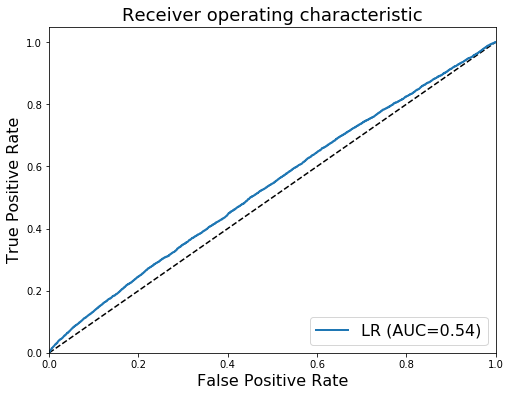

In [72]:
fpr, tpr, _ = roc_curve(Y_test,adabst.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [73]:
print(classification_report(Y_test,adabst.predict(X_test)))
#really bad idea ... it's long and wrong....

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    171842
          1       0.18      0.00      0.01      6492

avg / total       0.94      0.96      0.95    178334



In [74]:
#let's train decision tree classifier as seen in class 
DT = DecisionTreeClassifier()

parameters = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,5,9,11],
    'class_weight': [{0:0.9,1:1},{0:0.85,1:1}],
    'max_leaf_nodes': [None,42]
    
}

CLF2 = GridSearchCV(DT,parameters,n_jobs=-1,scoring=custom_score3,verbose=3,cv=2)

In [75]:
CLF2.fit(new_Xtrain.values,new_Ytrain.values.ravel())

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=None 
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=None 
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=42 
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=42 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=None, score=0.437712 -   4.1s
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=None, score=0.407585 -   4.2s
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=None 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=42, score=0.416025 -   5.6s
[CV] class_weight={0: 0.9, 1: 1}, criterion=gini, max_depth=5, max_leaf_nodes=42 
[CV]  class_weight={0: 0.9, 1: 1

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   50.0s


[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=9, max_leaf_nodes=None, score=0.485027 -  10.6s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=9, max_leaf_nodes=None, score=0.495979 -  10.8s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=9, max_leaf_nodes=42, score=0.463231 -   8.8s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=42 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=9, max_leaf_nodes=42, score=0.450515 -   8.8s
[CV] class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=42 
[CV]  class_weight={0: 0.9, 1: 1}, criterion=entropy, max_depth=11, max_leaf_nodes=None, score=0.536312 -  11.3s
[CV] class_weight={0: 0.85, 1: 1}, criterion=gini, max_depth=3, max_leaf_nodes=None 
[CV]  clas

[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  2.1min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 9, 11], 'class_weight': [{0: 0.9, 1: 1}, {0: 0.85, 1: 1}], 'max_leaf_nodes': [None, 42]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(loss_func2), verbose=3)

In [76]:
CLF2.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.85, 1: 1}, criterion='gini',
            max_depth=11, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
preds = CLF2.best_estimator_.predict_proba(X_test.values)

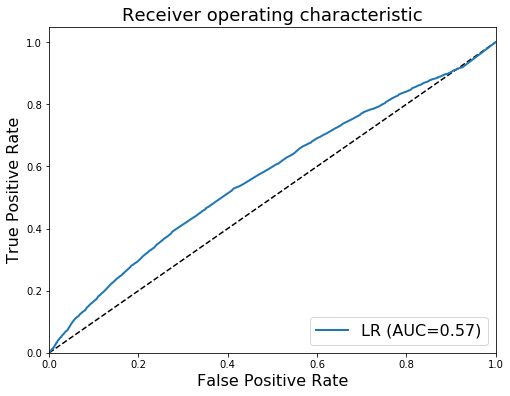

In [78]:
fpr, tpr, _ = roc_curve(Y_test,preds[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

In [79]:
print(classification_report(Y_test.values,CLF2.best_estimator_.predict(X_test.values)))

             precision    recall  f1-score   support

          0       0.97      0.80      0.88    171842
          1       0.05      0.30      0.09      6492

avg / total       0.93      0.78      0.85    178334



We can see in scikit learn that their is a voting classifier, it was mentionned if we are corrrect during Stéphane Gaïffas introduction to Machine Learning class, and as we try a few classifier it can be easilly implemented.

We will only try with both estimator that worked the best that is clf, CLF and CLF2

Source : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [80]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('DT',CLF.best_estimator_),('gbm',clf.best_estimator_)],n_jobs=-1,voting='soft')

In [81]:
eclf.fit(new_Xtrain.values,new_Ytrain.values.ravel())

VotingClassifier(estimators=[('DT', RandomForestClassifier(bootstrap=True, class_weight={0: 0.8, 1: 1},
            criterion='gini', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2...stic', reg_alpha=8, reg_lambda=1,
       scale_pos_weight=1.5, seed=0, silent=True, subsample=0.6))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

             precision    recall  f1-score   support

          0       0.97      0.83      0.89    171842
          1       0.06      0.32      0.11      6492

avg / total       0.94      0.81      0.86    178334



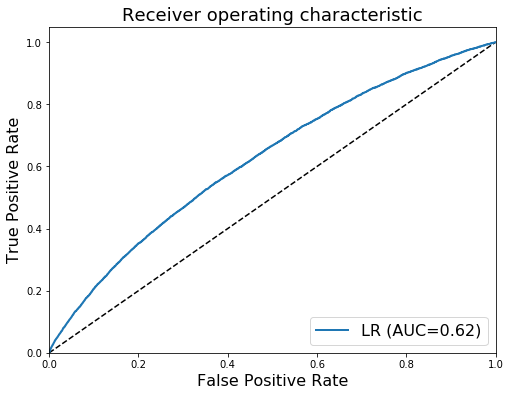

In [82]:
fpr, tpr, _ = roc_curve(Y_test.values,eclf.predict_proba(X_test.values)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="LR (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

print(classification_report(Y_test.values,eclf.predict(X_test.values)))
#not so good but 

# Neural networks 

We tested gradient boosting and random forest first because we belived that it would work very well since we have mostly categorical features .

For the same reason we test neural networks in last

In [83]:
import tensorflow as tf
import keras 

Using TensorFlow backend.


In [84]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import activations
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
new_Xtrain = scaler.fit_transform(new_Xtrain)

In [86]:
X_t , Y_t = new_Xtrain.astype(np.float32).copy(), new_Ytrain.values.astype(np.float32).copy()

In [87]:
X_t.shape[0]

658190

In [88]:
from keras.layers.advanced_activations import PReLU

In [94]:
model = Sequential()

act = 'relu'

model.add(Dense(33,input_shape=(46,),activation=act))
model.add(Dropout(0.5))
model.add(Dense(20,activation=act))
model.add(Dropout(0.5))
model.add(Dense(15,activation=act))
model.add(Dense(13,activation=act))
model.add(Dropout(0.5))
model.add(Dense(8,activation=act))
model.add(Dense(5,activation=act))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
              
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 33)                1551      
_________________________________________________________________
dropout_5 (Dropout)          (None, 33)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                680       
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_11 (Dense)             (None, 13)                208       
_________________________________________________________________
dropout_7 (Dropout)          (None, 13)                0         
__________

In [95]:
batch_size = 20
epochs = 3

history = model.fit(X_t, Y_t,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_test.astype(np.float32).values, Y_test))

Train on 658190 samples, validate on 178334 samples
Epoch 1/3
658190/658190 [==============================] - 50s - loss: 0.6685 - acc: 0.6090 - val_loss: 0.6277 - val_acc: 0.8245
Epoch 2/3
658190/658190 [==============================] - 49s - loss: 0.6621 - acc: 0.6145 - val_loss: 0.6269 - val_acc: 0.7744
Epoch 3/3
658190/658190 [==============================] - 49s - loss: 0.6605 - acc: 0.6158 - val_loss: 0.5863 - val_acc: 0.9298


In [96]:
score = model.evaluate(X_test.astype(np.float32).values, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.586311295861
Test accuracy: 0.929817084797


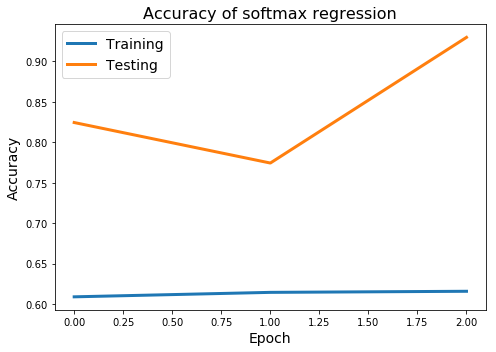

In [97]:
plt.figure(figsize=(7, 5))
plt.plot(history.epoch, history.history['acc'], lw=3, label='Training')
plt.plot(history.epoch, history.history['val_acc'], lw=3, label='Testing')
plt.legend(fontsize=14)
plt.title('Accuracy of softmax regression', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tight_layout()

In [98]:
model.predict(X_test.values)

array([[ 0.46046951],
       [ 0.41661268],
       [ 0.51355487],
       ..., 
       [ 0.41041714],
       [ 0.47066006],
       [ 0.39822659]], dtype=float32)

In [99]:
print(classification_report(Y_test,model.predict_classes(X_test.values)))

176928/178334 [============================>.] - ETA: 0s             precision    recall  f1-score   support

          0       0.96      0.96      0.96    171842
          1       0.06      0.07      0.06      6492

avg / total       0.93      0.93      0.93    178334



In [ ]:
#We clearly see that a neural network is not working very well

Another idea suggested was to reduce the number of data labeled as $0$'s.

Instead of just drooping lines at random we will use the k_means algorithm seen in the ML class 

Indeed we want to drop as many 0's as wee can but while preserving the information and disparity of them .An idea we had is to use clustering to see wich data point gives the same intel and then you just want to take this centroid as a representant of all it's neighboors 

Of cours this will be very long to run but we will post the code bellow : 

In [101]:
from sklearn.cluster import k_means

In [102]:
#centroids,_,_ = k_means(X_train[~Y_train.isin([1]).values],n_clusters=15000,n_init=1)

#this doesn't work on our computers and returns a memeory error... so I comment it to avoid crashing your computer!

This allows us of having a database of 30000 points and equilibrated (of course we kept only $8\%$ on the original data so it might not be a good idea)

But if this algorithm finishes one day we could see how well it performs on similar classifications tasks as above and compare the results 

Let's try another idea : maybe deep learning does not work because the weights are not initialized correctly so by using autoencoder for preprocessing it could improve our model (?)

In [103]:
import numpy as np
import tensorflow as tf


tf.reset_default_graph()
sess=tf.InteractiveSession()


def Gaussian(x):
    x = x + np.random.normal(0,1,x.shape)
    return x

def encoding_process(batch, Weight, Biases):
    H = tf.nn.sigmoid(tf.add(tf.matmul(batch,Weight),Biases))
    return H

def decoding_process(encoded_batch, Weight, Biases):
    H = tf.nn.sigmoid(tf.add(tf.matmul(encoded_batch,Weight),Biases))
    return H

def DAE(data, Archi, noise = Gaussian, batch_size = 500,pre_pross=True, training_epochs=5, learning_rate = 0.01, decoder=False,disp_step=30):
    """
   Computes the denoising-autoencoder algorithm:
       
   It's a non-supervised deep learning algorithm
   every layer of the neural net is trained to encode in the best way possible so that it will be able to reconstruct data from the previous layer.
   The algorithm can be used just for pre-processing in that case you are just interested in finding the encoding weights,
   but decoding weights can also be usefull for exemple if you want to compare imitation as a social behavior or 
   if you want to know if a part of a specific image is hidden by a random object
   **reference paper** : 
   
       -Pascal Vincent, Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion
       -Andrew NG, CS294A Lecture notes, Sparse autoencoder
   
   Almost every TensorFlow objects are writen as dictionnary as the architecture of the neural net is left to the user.
   Cost and optimizer are also stored in dictionnaries so that the graph is totally defined before any run 
   
   parameters :
       :param data: a numpy-array containing the training data
       
       :param Archi: a list containing the archistecture of your neural net each element of the list indicates the number of neurones per hidden layers
       (exemple [225,121] represent a neural network with 225 neurone in the first hidden layer and 121 in the second one)
       
       :param noise: just Gaussian noise is avalable for now
       
       :param batch_size: size of the batches
       
       :param training_epochs: the number of times you want your neural network to run over all your dataset
       
       :param learning_rate: the learning rate used in the optimizer
       
       :param decoder: boolean, if True returns the weight of the encoding and the decoding process.
       
    returns : E_Weights, E_Biases two dictionnary containing your weights 
    can also return E_Weights, E_Biases, D_Weights, D_Biases if you want the encoding and decoding weights
    
    to see an exemple of utilisation see '/SyncPy-master/exemples/DAE_exemple'
    to see an exemple of utilisation in case of preprocessing '/SyncPy-master/exemples/DAE_pre_processing
    
    NB: do not declare a tf.Sessoin() before or after using DAE instead use the current DAE session.
    To do so you need to enter "sess = tf.get_default_session()" after the call of DAE
     """
     
    input_size = data.shape[1]
    Archi = np.array(Archi)
    l = Archi.size
    E_Weights = {}; E_Biases = {}
    D_Weights = {}; D_Biases = {}    
    I_P = {} ;
    cost = {} ; opt = {}
    
    """placeholders initialisation"""
    for i in range(l):
        if i == 0:
            I_P['P'+str(i)] = tf.placeholder(tf.float32, [batch_size,input_size])
        else :
            I_P['P'+str(i)] = tf.placeholder(tf.float32, [batch_size,Archi[i-1]])

    """Weights and Biases initialisation for the Encoding process"""
    for i in range(1,l+1):
        if i ==1:
            E_Weights['W'+str(i)] = tf.Variable(tf.random_normal([input_size,Archi[i-1]],0,0.1))
        else:
            E_Weights['W'+str(i)] = tf.Variable(tf.random_normal([Archi[i-2],Archi[i-1]],0,0.1))
    for i in range(1,l+1):
        E_Biases['B'+str(i)] = tf.Variable(tf.random_normal([Archi[i-1]],0,0.1))
        
    """Weights and Biases initialisation for the Decoding process"""
    for i in range(1,l+1):
        if i ==1:
            D_Weights['W'+str(i)] = tf.Variable(tf.random_normal([Archi[i-1],input_size],0,0.1))
        else:
            D_Weights['W'+str(i)] = tf.Variable(tf.random_normal([Archi[i-1],Archi[i-2]],0,0.1))
    for i in range(1,l+1):
        if i ==1:
            D_Biases['B'+str(i)] = tf.Variable(tf.random_normal([input_size],0,0.1))
        else:
             D_Biases['B'+str(i)] = tf.Variable(tf.random_normal([Archi[i-2]],0,0.1))
             
    """definition of the cost functions"""
    for i in range(l):
        E = encoding_process(I_P['P'+str(i)],E_Weights['W'+str(i+1)],E_Biases['B'+str(i+1)]) 
        D = decoding_process(E,D_Weights['W'+str(i+1)],D_Biases['B'+str(i+1)])
        cost['c' +str(i)] = tf.reduce_mean(tf.pow(I_P['P'+str(i)]-D,2))

    """definition of the optimizers"""
    for i in range(l):
        opt['o'+str(i)] = tf.train.AdamOptimizer(learning_rate).minimize(cost['c' +str(i)])
    
    
    
    """training process"""    
    init = tf.global_variables_initializer()
    sess.run(init)
    total_batch = int(data.shape[0]/batch_size)
    for i in range(l):
        print('\n')
        print("###################################")
        print("#   optimizing layer nubmer : " +str(i+1) +"   #")
        print("###################################\n")
        if i == 0:
            data = data
#seem redondant but it's important to understand the logic of the code i think
        else :
            W = E_Weights['W'+str(i)].eval()
            B = E_Biases['B'+str(i)].eval()
            data = tf.nn.sigmoid(tf.add(tf.matmul(data,W),B)).eval()
        for epochs in range(training_epochs):
            print('epochs number :'+str(epochs+1))
            for j in range(total_batch):
                U = data[j*batch_size:(j+1)*batch_size,:]
                _,c = sess.run([opt['o'+str(i)],cost['c' +str(i)]],feed_dict={I_P['P'+str(i)] : U})
                if j % disp_step == 0:
                    print("the cost is : " +str(c))
    
    """In case you want to use DAE for pre-processing, so you can initialize your variable in the same time that every thing else"""
    if pre_pross == True:
        l = []
        for key in E_Weights:
            val = E_Weights[key].eval()
            E_Weights[key] = tf.Variable(val)
            l.append(E_Weights[key])
        for key in E_Biases:
            val = E_Biases[key].eval()
            E_Biases[key] = tf.Variable(val)
            l.append(E_Biases[key])
            
        init = tf.variables_initializer(l)
        sess.run(init)


    """return """    
    if decoder == True:
        return E_Weights, E_Biases, D_Weights, D_Biases
    else:
        return E_Weights, E_Biases

#source = https://github.com/JeanZAG/Denoising-autoencoder/blob/master/DAE.py

In [ ]:
learning_rate = 0.01
epochs = 7
batch_size = 300

x = tf.placeholder(dtype=tf.float32,shape=[None,46])
y_hat = tf.placeholder(dtype=tf.float32,shape=[None,1])

W1, B1 = DAE((X_train.values).astype(np.float32),[35,20,10,5,1],batch_size=500,training_epochs=20,learning_rate=0.015)

sess=tf.get_default_session()


def RN1(x):
    L1 = tf.sigmoid(tf.add(tf.matmul(x,W1['W1']),B1['B1']))
    L2 = tf.sigmoid(tf.add(tf.matmul(L1,W1['W2']),B1['B2']))
    l3 = tf.sigmoid(tf.add(tf.matmul(L2,W1['W3']),B1['B3']))
    l4 = tf.sigmoid(tf.add(tf.matmul(l3,W1['W4']),B1['B4']))
    l5 = tf.sigmoid(tf.add(tf.matmul(l4,W1['W5']),B1['B5']))
    return l5

loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_hat,logits=RN1(x)))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)


#valX = X_train.copy()
valX = X_t
#valY = Y_train.copy()
valY = Y_t
init = tf.global_variables_initializer()
sess.run(init)
total_batch = int(416110/batch_size)
for e in range(epochs):
    for i in range(total_batch):
        batch_X = valX[i*batch_size:(i+1)*batch_size,:]
        batch_Y = valY[i*batch_size:(i+1)*batch_size]
        l,e = batch_X.shape
        batch_Y = batch_Y.reshape(l,1)
        _,c= sess.run([optimizer,loss],feed_dict={x : batch_X, y_hat : batch_Y})
        
#we are inable to reconstruct this data properly...

             precision    recall  f1-score   support

          0       0.96      1.00      0.98    171842
          1       0.00      0.00      0.00      6492

avg / total       0.93      0.96      0.95    178334



/home/zagdoun/anaconda2/envs/tensorflow3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


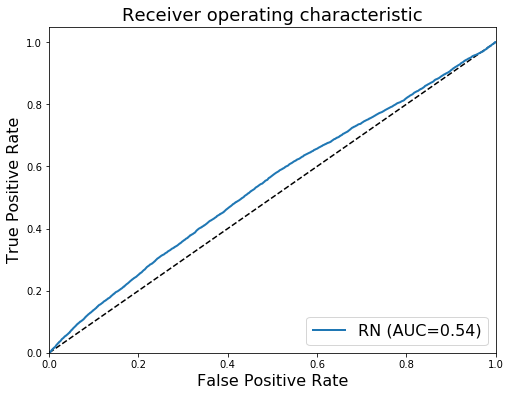

In [109]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

X_test = X_test.astype(np.float32)       
XX_test = sess.run(RN1(X_test))



fpr, tpr, _ = roc_curve(Y_test, XX_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="RN (AUC=%.2f)" % roc_auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=18)
plt.legend(loc="lower right", fontsize=16)

report = pd.DataFrame(XX_test)

XX_test = XX_test.astype(int)
print(classification_report(Y_test, XX_test))
#we only learned ho to reconstruct 0's it's a bad model

# Conclusion of this notebook

The main problem we had was the lack of $1$'s in the dataset and this led to various ways to handle this situation for example using the parameter "class_weight" and/or multiplying the number of $1$'s in our data set

To sum up we used these models :

    -Decision tree classifier (seen in course) used by scikit learn
    -adaboost (seen in course) used by scikit learn
    -Random Forest classifier used by scikit learn
    -Gradient boosting method (seen in course) used by XGBoost 
    -Grid search method (mentioned in course) used by scikit-learn
    -Feed forward neural networks (seen in course) used by keras/TensorFlow/PyTorch
    -Denoising Autoencoders for preprocessing (mentioned in course) used by TensorFlow (do not work at all on this problem)
    -VotingClassifer (mentioned in course) used by scikit-learn
    -PCA (mentioned in course) used by scikit-learn
    
$$$$    
Our best algorithm can be sum up in this little tab 
$$$$
$$$$

| Algo     |    AUC   |   Recall (1's) | Recall (0's) | Remarks
| ------------- |: -------------: | ---------: |
| Decision tree      |     .56 | .33| .76        |      Bad AUC but good recall |
| Random forest        |        .61        |      .20 |   .90 | soso 
| XGBoost      |        .62        |      .41 | .74 | Slow but good
| Voter | .62 | .31 | .83 | Good and fun
$$$$
Among our worst algortihm can be found adaboost and neural network (it's probably us who didn't manage to tune them up).

Those mesure are not guarented for sure since they can change: the result might vary because of the randomness in the code!